# Introduction to Data Science
## Homework 3

Student Name: Zixuan Shao

Student Netid: zs2167
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

$$\text{Information Gain} = H(Y) – H(Y \mid X)$$

$$ = -\sum_{y \in Y} p(y) \cdot log(p(y)) + \sum_{x \in X} p(x) \cdot \sum_{y \in Y} P(y \mid x) \cdot log(p(y \mid x))$$

$$ = -\sum_{y \in Y} log(p(y)) \cdot \sum_{x \in X} p(x,y) + \sum_{x \in X} p(x) \cdot \sum_{y \in Y} \frac{p(x,y)}{p(x)} \cdot log(\frac{p(x,y)}{p(x)})$$

$$ = -\sum_{y \in Y} \sum_{x \in X} p(x,y) \cdot log(p(y)) + \sum_{x \in X} \sum_{y \in Y} p(x,y) \cdot log(\frac{p(x,y)}{p(x)})$$

$$ = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$ = \text{Mutual Information}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [52]:
import pandas as pd
import numpy as np
col = ["revenue", "outcalls", "incalls", "months", "eqpdays", "webcap", "marryyes", "travel", "pcown", "creditcd", "retcalls", "churndep"]
data = pd.read_csv("./cell2cell_data.csv", header = None, names = col)
data.shape

(39859, 12)

In [53]:
# split the data
split_per = 0.8
# draw n samples from uniform distribution and construct a filter
filt = np.random.rand(data.shape[0]) < split_per
# draw train and test data
train_df = data[filt]
test_df = data[filt == False]

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

<p>We can validate the spliting by checking the distribution of all variables between train and test data set are roughly equal. For quantitative variable, we can compare mean and variance, and for qualitative variable, we can compare the percentage of classes.</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy')
Y = train_df["churndep"]
X = train_df.drop("churndep", 1)
dtc.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

<BarContainer object of 11 artists>

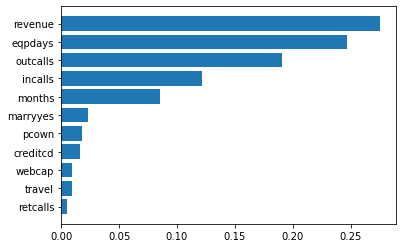

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp = list(zip(X.columns.values,dtc.feature_importances_))
feat_imp.sort(key = lambda x: x[1])
features, importances = zip(*feat_imp)
plt.barh(features, importances, align = 'center')

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [56]:
train_df[["revenue","eqpdays","outcalls","churndep"]].corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.223654,0.496893,-0.017737
eqpdays,-0.223654,1.000000,-0.240775,0.113737
outcalls,0.496893,-0.240775,1.000000,-0.038277
churndep,-0.017737,0.113737,-0.038277,1.000000


- We can interpret the cross relationship between top3 features and response variables by correlation matrix.
- As we can see above, positive value indicates that two variables are positively correlated and vice visa.
- churn is only positively correlated with number of days the consumer have the equipment, which makes sense because longer time consumers keep the product, higher probability they would churn.
- churn is negatively correlated with revenue and outcalls. The higher revenues consumers have, less probability that they care about churning. It also explains the weak correlation as people with high revenue could still care about spending in detail, but in general two variables are negatively correlated.
- churn is negatively correlated with outbound call because too many outbound calls may annoy existing consumers and therefore increase their tendency to churn.

6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [57]:
pred_train = dtc.predict_proba(X)
pred_test = dtc.predict_proba(test_df.drop("churndep", 1))
accur_train = dtc.score(X, Y)
accur_test = dtc.score(test_df.drop("churndep", 1), test_df["churndep"])

In [59]:
print([pred_train, pred_test])

[array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]]), array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])]


In [60]:
print([accur_train, accur_test])

[0.9998432896633862, 0.5360241418332705]


<p> When the train accuracy is significantly higher than the test accuracy, we can conclude that the model overfitting the training data set.</p>

### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [109]:
min_samples_split_values = np.random.exponential(scale = 0.02, size = 10)
min_samples_leaf_values = np.random.exponential(scale = 0.01, size = 10)

In [110]:
min_samples_leaf_values

array([0.00428435, 0.01142785, 0.0090217 , 0.0022155 , 0.00260825,
       0.00291092, 0.0217475 , 0.00440443, 0.00197325, 0.0018552 ])

In [114]:
min_samples_split_values

array([0.01030114, 0.00129383, 0.01861483, 0.02355537, 0.04100291,
       0.00810082, 0.11565921, 0.02025822, 0.02978272, 0.02404959])

2\. Explain in words your reasoning for choosing the above ranges.

Based on previous overfitting model, default value for minimum split and leaf values of 2 and 1 should be the lower bound of hyperparameter. We know that importance of hyperparameter is not uniformly distribution, but skewed towards their default. Therefore, I decide to use random search from an exponential distribution with a suitable expected value, as higher value of min split and leaf values are very likely to underfit. I draw minimum leaf values at lower value because leaf node can tolerate fewer samples than inner node. Considering the large size of data, use integer value minimum number may not be suitable, instead I decide to use fraction of the sample size. Furthermore, I can do some simple empirical test on the general performance based on the parameter of exponential distribution to well locate the basic expected value of the hyperparameter.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

Text(0, 0.5, 'accuracy')

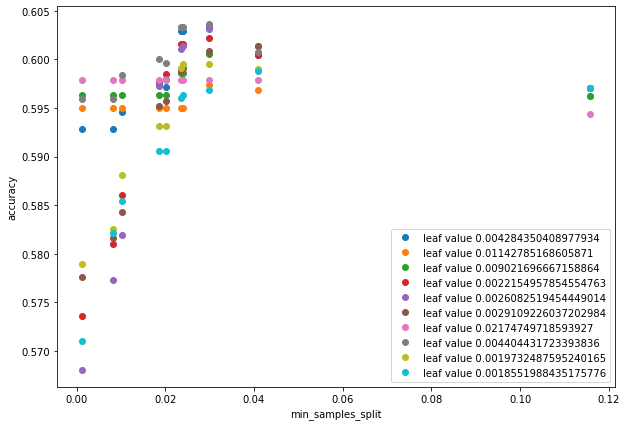

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10,7))
for lf in min_samples_leaf_values:
    accuracy = np.zeros(10)
    for i in range(10):
        accuracy[i] = DecisionTreeClassifier(criterion='entropy', 
                                          min_samples_split = min_samples_split_values[i], 
                                        min_samples_leaf = lf).fit(X,Y).score(test_df.drop("churndep", 1), test_df["churndep"])
    plt.plot(min_samples_split_values, accuracy, label = "leaf value {}".format(lf), marker = "o", linestyle = 'None')
plt.legend()    
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [115]:
best_min_split = 0.02978272
best_min_leaf = 0.00440443
best_fit_accur = DecisionTreeClassifier(criterion='entropy', min_samples_split = best_min_split, 
                                        min_samples_leaf = best_min_leaf).fit(X,Y).score(test_df.drop("churndep", 1), test_df["churndep"])
best_fit_accur

0.6036715704765497

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

I would try to predict whether the consumer whould churn or not based on their information tested on my model and decide whether we should take some actions to prevent the customer from churning. For example, the company can select those who are likely churn and send some recent sales ads to draw their attention. Churn prediction is good because it proactively raises red flag for the company and indirectly get the feedback from customers about the product even before customers realize, greatly profecting the customer basis.